# WeatherPy
----

#### Observations
* Latitude has no direct effect on the weather cloudiness.
* The lower the latitide, the higher the temperature.
* The closer to the equator the lower the wind speed.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import pprint as pp

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
min_temp = []
wind_speed = []
city_id = []

# adding 1 so that it can loop through the next city
record = 0

for city in cities:
    try:
        target_url = ("http://api.openweathermap.org/data/2.5/weather?q={0}&appid={1}").format(city,weather_api_key)
        response = requests.get(target_url).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        min_temp.append(response["main"]["temp_min"])
        wind_speed.append(response["wind"]["speed"])
        city_id.append(response["id"])
        record = record + 1
        print (f'{city} ID number is {record}. City found.')
    except (KeyError, IndexError):
        record = record + 1
        print (f'{city} ID number is {record}. City not found.')
    
    
        
    

qaanaaq ID number is 1. City found.
rikitea ID number is 2. City found.
bathsheba ID number is 3. City found.
saskylakh ID number is 4. City found.
tahoua ID number is 5. City found.
saint-georges ID number is 6. City found.
mataura ID number is 7. City found.
pasan ID number is 8. City found.
fortuna ID number is 9. City found.
cervo ID number is 10. City found.
leningradskiy ID number is 11. City found.
juneau ID number is 12. City found.
tautira ID number is 13. City found.
ushuaia ID number is 14. City found.
cidreira ID number is 15. City found.
ancud ID number is 16. City found.
saldanha ID number is 17. City found.
nizhneyansk ID number is 18. City not found.
hilo ID number is 19. City found.
busselton ID number is 20. City found.
lavrentiya ID number is 21. City found.
hobart ID number is 22. City found.
jamestown ID number is 23. City found.
tokur ID number is 24. City found.
hermanus ID number is 25. City found.
clyde river ID number is 26. City found.
saint-philippe ID numbe

buchanan ID number is 210. City found.
carberry ID number is 211. City found.
yar-sale ID number is 212. City found.
pierre ID number is 213. City found.
port hawkesbury ID number is 214. City found.
mayo ID number is 215. City found.
ucluelet ID number is 216. City found.
kargil ID number is 217. City found.
meyungs ID number is 218. City not found.
namibe ID number is 219. City found.
zuwarah ID number is 220. City found.
sinnamary ID number is 221. City found.
port lincoln ID number is 222. City found.
haines junction ID number is 223. City found.
carnarvon ID number is 224. City found.
daytona beach ID number is 225. City found.
gardner ID number is 226. City found.
thinadhoo ID number is 227. City found.
pevek ID number is 228. City found.
cap malheureux ID number is 229. City found.
angren ID number is 230. City found.
kota kinabalu ID number is 231. City found.
nome ID number is 232. City found.
mufumbwe ID number is 233. City found.
kostroma ID number is 234. City found.
shingu

aykhal ID number is 417. City found.
biak ID number is 418. City found.
ekhabi ID number is 419. City found.
marawi ID number is 420. City found.
george ID number is 421. City found.
kyren ID number is 422. City found.
buraydah ID number is 423. City found.
boa vista ID number is 424. City found.
sechura ID number is 425. City found.
provideniya ID number is 426. City found.
sambava ID number is 427. City found.
catia la mar ID number is 428. City found.
iqaluit ID number is 429. City found.
qinzhou ID number is 430. City found.
bairiki ID number is 431. City found.
muriwai beach ID number is 432. City found.
qandahar ID number is 433. City not found.
thano bula khan ID number is 434. City not found.
okha ID number is 435. City found.
dingle ID number is 436. City found.
oloron-sainte-marie ID number is 437. City found.
fairbanks ID number is 438. City found.
belushya guba ID number is 439. City not found.
faya ID number is 440. City found.
quedlinburg ID number is 441. City found.
ust

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
city_dict = {"City Name": city_name, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity, "Latitude": lat, "Longitude": lng, "Max Temperature": max_temp, "Min Temperature": min_temp, "Wind Speed": wind_speed, "City ID": city_id}
city_df = pd.DataFrame(city_dict)
city_df


,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Min Temperature,Wind Speed,City ID
0,Qaanaaq,0,GL,1579657133,48,77.48,-69.36,247.22,247.22,2.57,3831208
1,Rikitea,11,PF,1579657134,78,-23.12,-134.97,299.17,299.17,5.55,4030556
2,Bathsheba,40,BB,1579656595,74,13.22,-59.52,299.15,299.15,5.10,3374083
3,Saskylakh,15,RU,1579657134,95,71.92,114.08,236.82,236.82,2.95,2017155
4,Tahoua,0,NE,1579657134,13,14.89,5.27,295.15,295.15,7.20,2439376
...,...,...,...,...,...,...,...,...,...,...,...
553,La Rioja,9,AR,1579657284,53,-29.41,-66.85,297.82,297.82,1.67,3848950
554,Kuloy,100,RU,1579657284,86,61.03,42.49,270.96,270.96,5.08,539385
555,Deniliquin,54,AU,1579657284,17,-35.53,144.97,306.94,306.94,9.02,2169068
556,Alexandria,56,EG,1579657246,57,31.22,29.96,283.69,283.69,1.74,361058


In [20]:
city_df.to_csv(r'city_data.csv')

In [21]:
city_csv = pd.read_csv('city_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

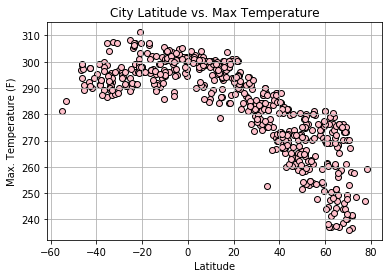

In [5]:
plt.scatter(city_dict["Latitude"], city_dict["Max Temperature"], marker="o", facecolors="pink", edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()


#### Latitude vs. Humidity Plot

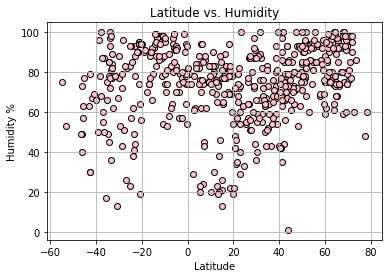

In [6]:
plt.scatter(city_dict["Latitude"], city_dict["Humidity"], marker="o", facecolors="pink", edgecolors="black")
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()


#### Latitude vs. Cloudiness Plot

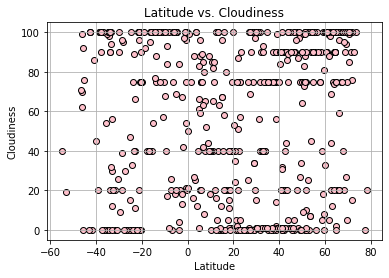

In [7]:
plt.scatter(city_dict["Latitude"], city_dict["Cloudiness"], marker="o", facecolors="pink", edgecolors="black")
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()


#### Latitude vs. Wind Speed Plot

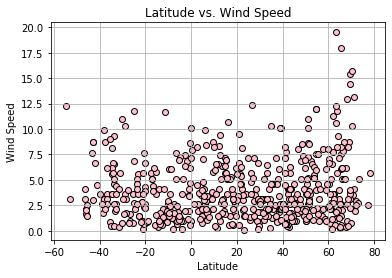

In [8]:
plt.scatter(city_dict["Latitude"], city_dict["Wind Speed"], marker="o", facecolors="pink", edgecolors="black")
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()


## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots



In [28]:
# Create Northern and Southern Hemisphere DataFrames
n_hemi = city_csv.loc[(city_csv["Latitude"] > 0)] 
s_hemi = city_csv.loc[(city_csv["Latitude"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

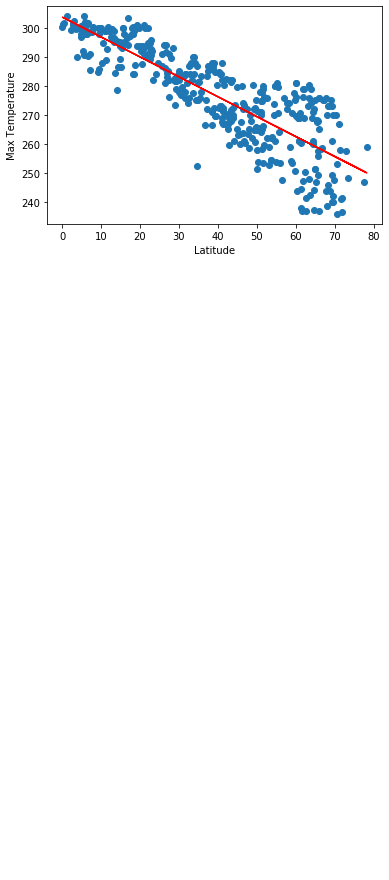

In [29]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

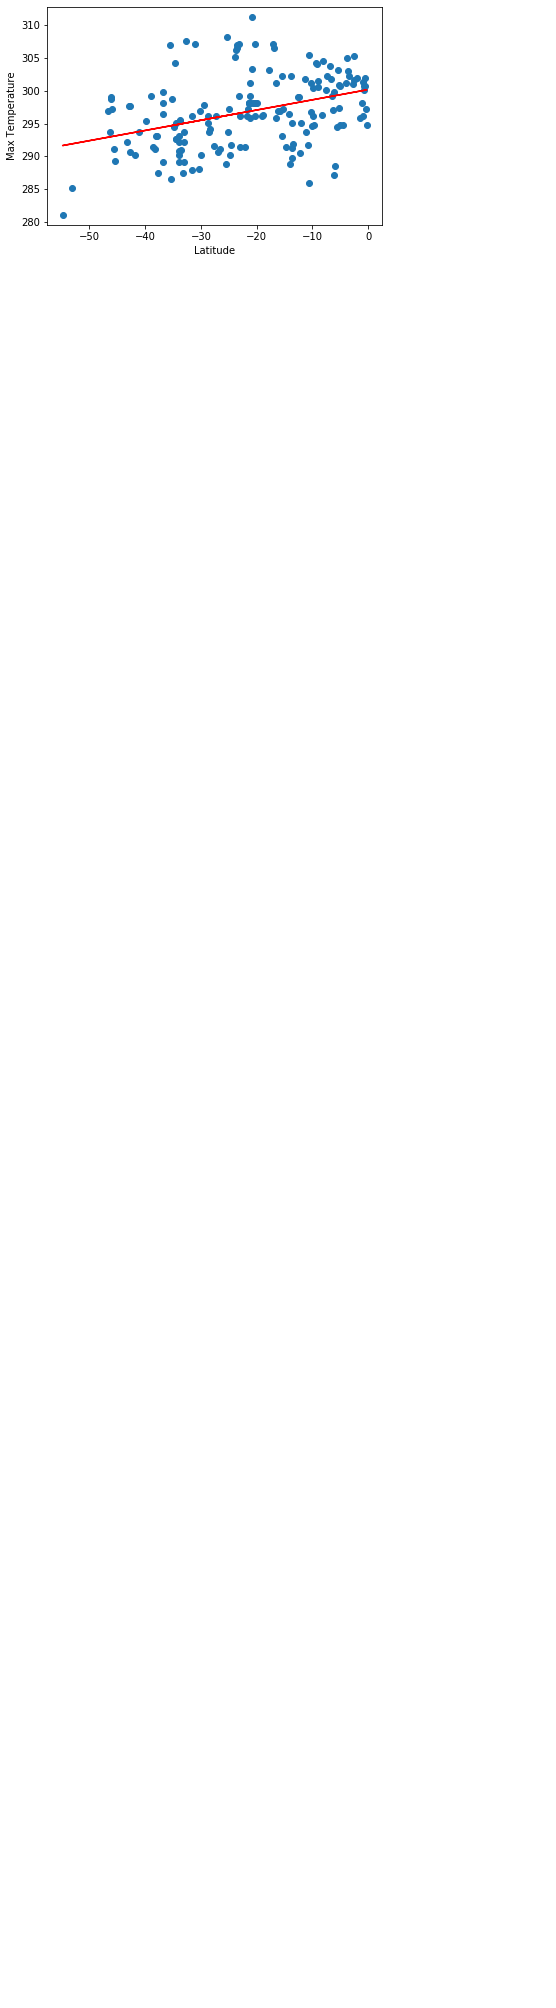

In [30]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

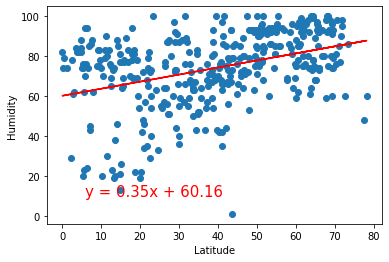

In [31]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

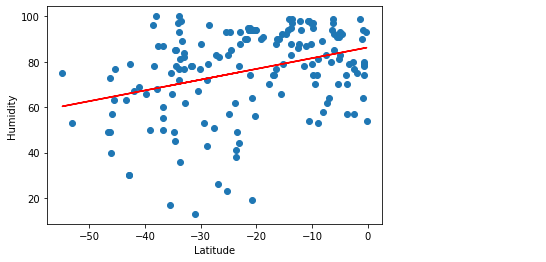

In [32]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

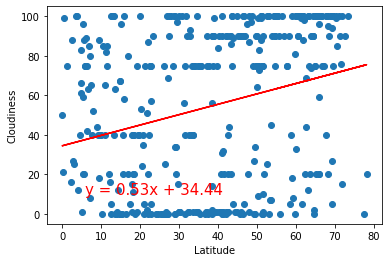

In [34]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

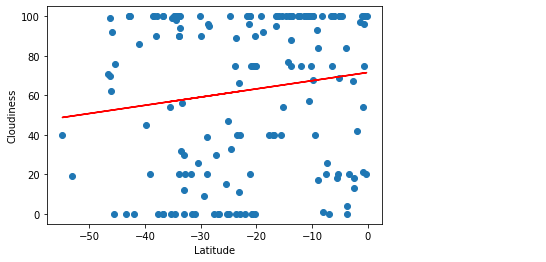

In [35]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

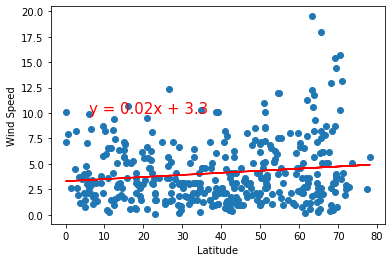

In [36]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

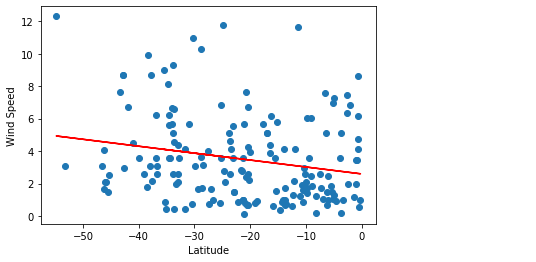

In [37]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
